# EDA 2

## Hacer preguntas

#### Ejemplos

- ¿Qué pasaría si sólo se hubiera analizado un grupo étnico?​
- ¿Qué pasaría si el dataset sólo tuviera estudiantes de un solo género?​
- ¿Qué pasaría si ningún estudiante hubiera completado el curso?​
- ¿Qué pasaría si el promedio de calificaciones fuera irregular?​

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv('data/StudentsPerformance.csv')

In [49]:
df = df.rename(columns={
    'race_ethnicity': 'ethnicity',
    'parental_level_of_education': 'parent_education',
    'test_preparation_course': 'preparation'
})

### Seleccionando solo los que tienen lunch free

In [50]:
df_free = (
    df[df.lunch == 'free/reduced']
    .drop('lunch', axis=1)
    .assign(
        mean_score = lambda df: (df.math_score + df.reading_score + df.writing_score) / 3
    )
    .sort_values(
        by='mean_score',
        ascending=False
    )
    )
df_free

,gender,ethnicity,parent_education,preparation,math_score,reading_score,writing_score,mean_score
149,male,group E,associate's degree,completed,100,100,93,97.666667
903,female,group D,bachelor's degree,completed,93,100,100,97.666667
566,female,group E,bachelor's degree,completed,92,100,100,97.333333
377,female,group D,master's degree,completed,85,95,100,93.333333
514,female,group B,master's degree,completed,77,97,94,89.333333
...,...,...,...,...,...,...,...,...
17,female,group B,some high school,none,18,32,28,26.000000
327,male,group A,some college,none,28,23,19,23.333333
596,male,group B,high school,none,30,24,15,23.000000
980,female,group B,high school,none,8,24,23,18.333333


### Comparando las medias de ambos datasets

In [51]:
df_free.describe().iloc[1]

math_score       58.921127
reading_score    64.653521
writing_score    63.022535
mean_score       62.199061
Name: mean, dtype: float64

In [52]:
(
    df
    .assign(
        mean_score = lambda df: (df.math_score + df.reading_score + df.writing_score) / 3
    )
    .describe()
    .iloc[1]
)

math_score       66.089000
reading_score    69.169000
writing_score    68.054000
mean_score       67.770667
Name: mean, dtype: float64

Se puede ver que las calificaciones de los que tienen lunch free baja unos puntos

### Comparando los conteos de cada categoría

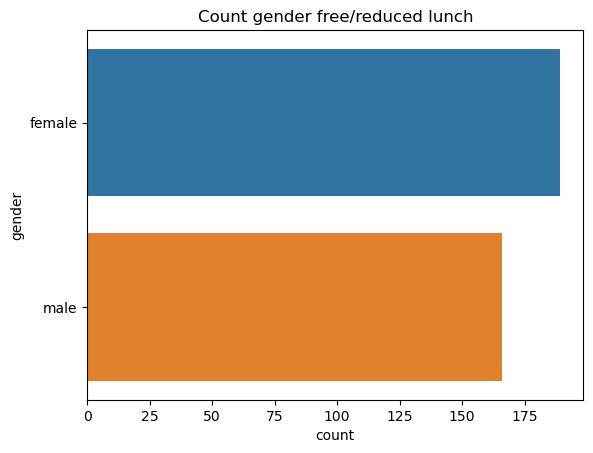

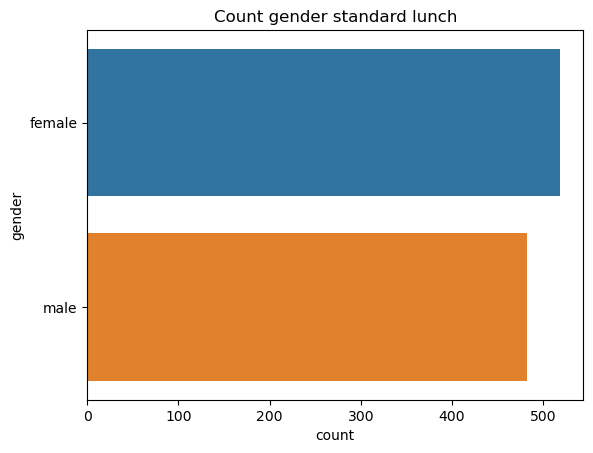

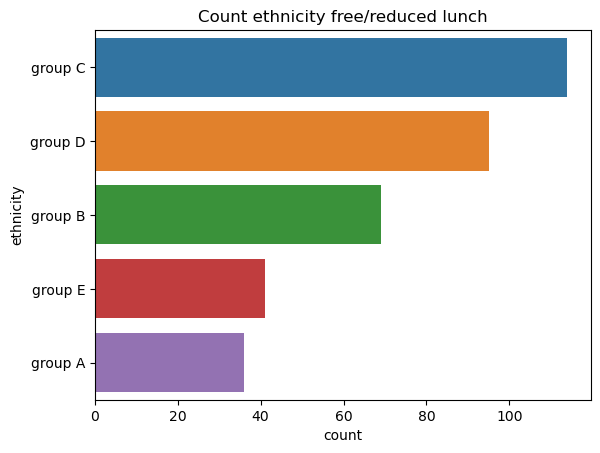

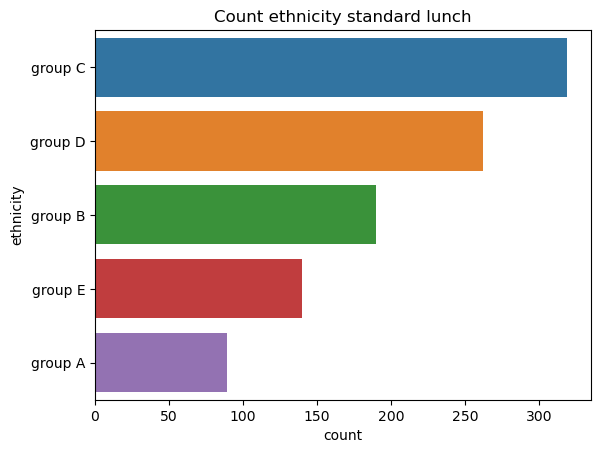

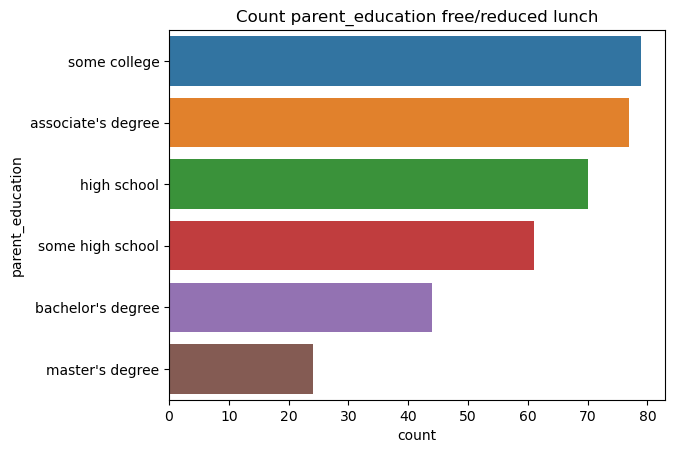

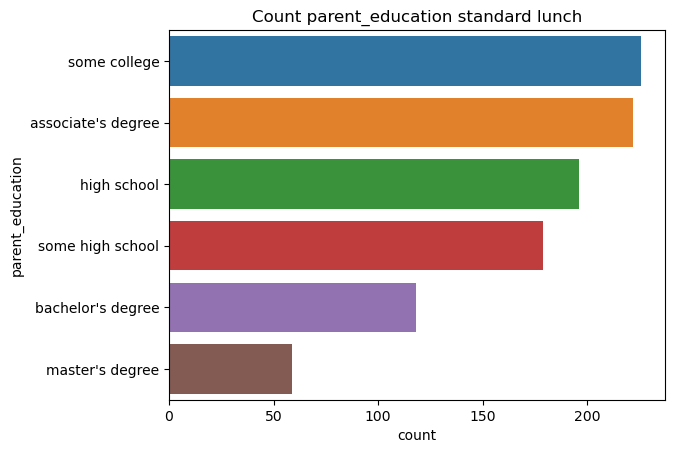

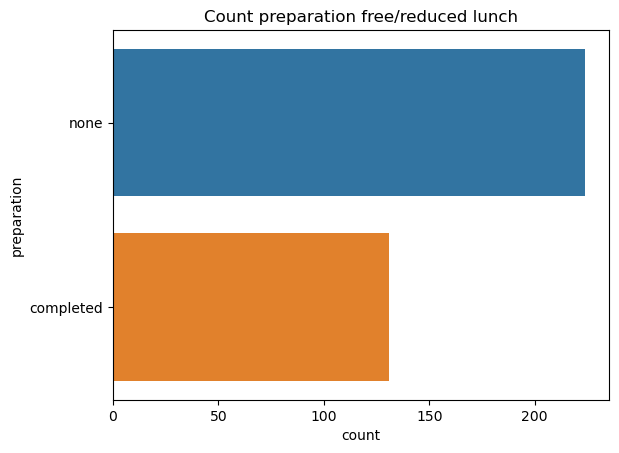

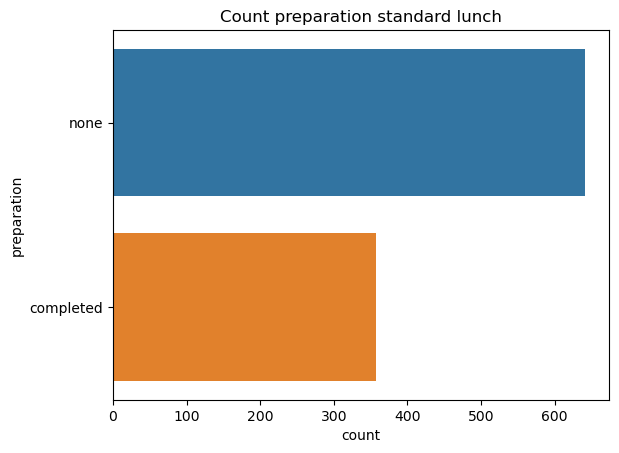

In [53]:
for category in df_free.select_dtypes(include=object).columns:
    sns.countplot(
        y=df_free[category],
        order=df_free[category].value_counts(ascending=False).index
    )
    plt.title(f'Count {category} free/reduced lunch')
    plt.show()
    sns.countplot(
        y=df[category],
        order=df[category].value_counts(ascending=False).index
    )
    plt.title(f'Count {category} standard lunch')
    plt.show()

In [54]:
def pandas_pie(data: pd.DataFrame):
    categories = list(data.select_dtypes(include= 'object'))
    num_rows = data.shape[0]
    for i, cat in enumerate(categories):
        counts = data[cat].value_counts().reset_index()
        labels = list(counts['index'])
        nums = np.array(counts[cat]) / num_rows
        plt.title(f'{cat}')
        plt.pie(nums, labels= labels, autopct='%.0f%%')
        plt.show()

### Seleccionando los que tienen lunch free/reduced, buena calificación (>80) y que tampoco reprobaron ningún examen

In [55]:
df_free_pass = (
    df_free[
        (df_free.mean_score >= 80)
        & (df_free.math_score > 60)
        & (df_free.reading_score > 60)
        & (df_free.writing_score > 60)
    ]
    .assign(
        parent_education = lambda df: df.parent_education.replace(
            list(df.parent_education.unique()),
            ['universidad', 'preparatoria', 'universidad', 'universidad', 'preparatoria', 'preparatoria']
        )
    )
)
len(df_free_pass)

39

### Seleccionando los que tienen lunch free/reduced, tienen mala media (<60) o que reprobaron algún examen

In [56]:
df_free_bad = (
    df_free[
        (df_free.mean_score < 60)
        | (df_free.math_score < 60)
        | (df_free.reading_score < 60)
        | (df_free.writing_score < 60)
    ]
    .assign(
        parent_education = lambda df: df.parent_education.replace(
            list(df.parent_education.unique()),
            ['universidad', 'preparatoria', 'universidad', 'universidad', 'preparatoria', 'preparatoria']
        )
    )
)
len(df_free_bad.index)

200

Se puede ver que son muchos menos que los que tienen buena media y pasaron todas

## Describir a los que tienen buena calificación

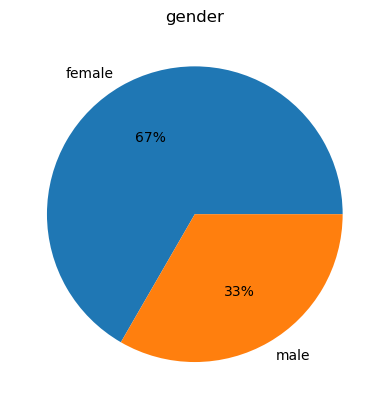

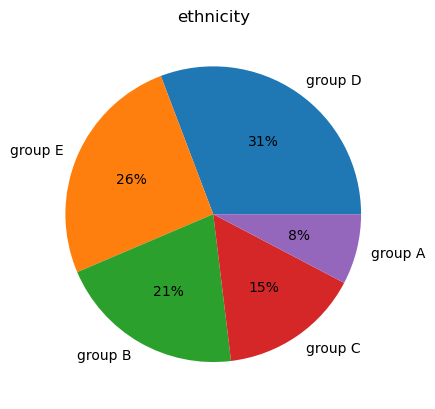

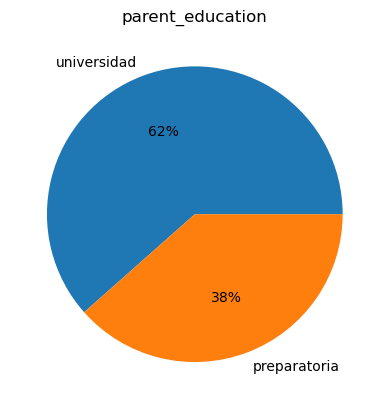

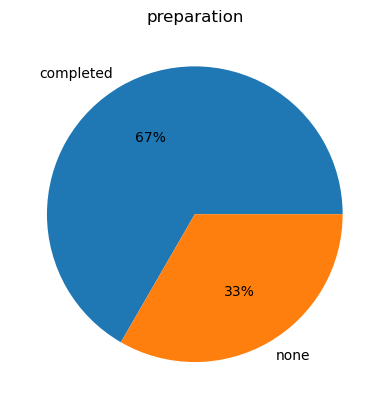

In [57]:
pandas_pie(df_free_pass)

In [58]:
df_free_bad = (
    df_free_bad
    .assign(math_pass = lambda df: df.math_score >= 60)
    .assign(reading_pass = lambda df: df.reading_score >= 60)
    .assign(writing_pass = lambda df: df.writing_score >= 60)
    .assign(mean_pass = lambda df: df.mean_score >= 60)
)

In [59]:
(
    df_free_bad
    .value_counts(['math_pass', 'reading_pass', 'writing_pass'])
    .reset_index(name='count')
)

,math_pass,reading_pass,writing_pass,count
0,False,False,False,108
1,False,True,True,47
2,False,True,False,13
3,True,False,False,13
4,True,True,False,10
5,False,False,True,7
6,True,False,True,2


### Dentro de lunch free/reduced
- Hay muchos que no pasaron no pasaron ninguna
- La materia mas reprobada es matemáticas

## Seleccionar y describir a los que no pasaron ninguna

In [60]:
df_free_superbad = (
    df_free_bad[
        (df_free_bad.math_pass == False)
        & (df_free_bad.writing_pass == False)
        & (df_free_bad.reading_pass == False)
    ]
)

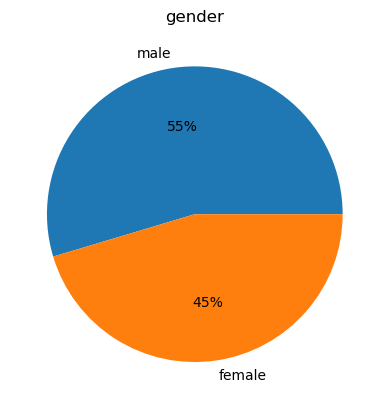

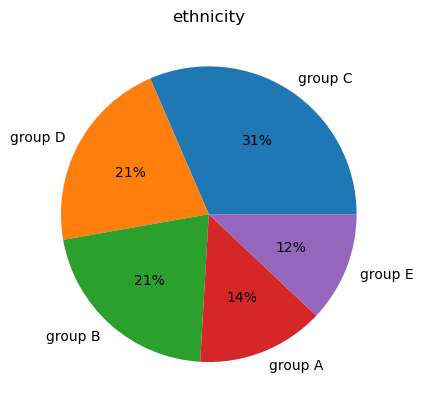

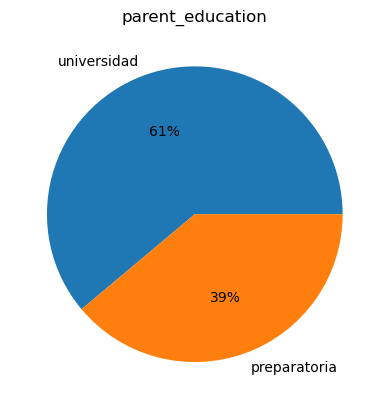

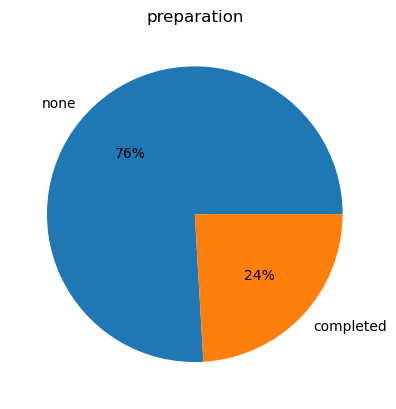

In [61]:
pandas_pie(df_free_superbad)

## Que pasa con matemáticas?

In [63]:
df_free_mat = (
    df_free_bad[~df_free_bad.math_pass]
)

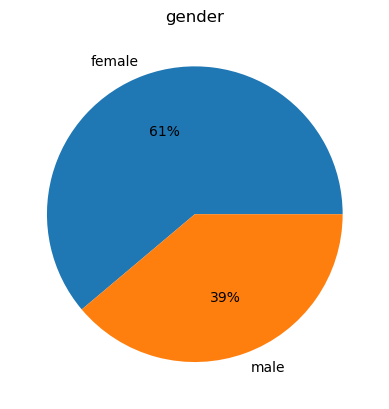

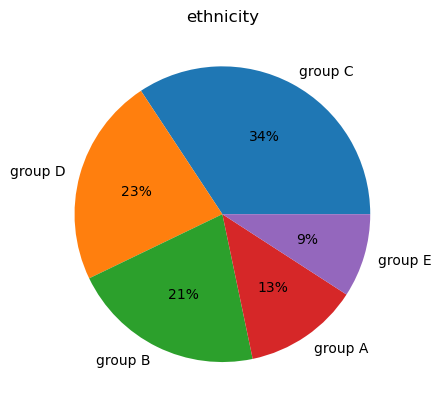

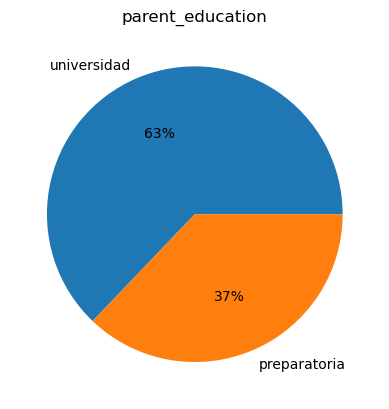

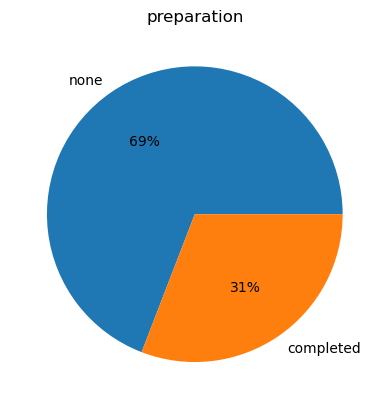

In [64]:
pandas_pie(df_free_mat)